# Классификация с помощью элементарного перцептрона. Ансамбли элементарных перцептронов.

In [13]:
import numpy as np
import random
from keras.datasets import mnist
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

In [16]:
x_train_noised = x_train.copy()
x_test_noised = x_test.copy()

In [17]:
x_train = np.append(x_train, np.ones([len(x_train),1]),1)
x_test = np.append(x_test, np.ones([len(x_test),1]),1)

Инициализация весов

In [18]:
w0 = np.zeros((10,785))
wx = np.zeros((10,1))

Обучение одного перцептрона

In [19]:
def train():
  global train_accuracy
  train_accuracy = 0
  
  for i in range(len(x_train)):
    for j in range(len(w0)):
      wx[j] = np.dot(x_train[i], w0[j])
    y_pred = np.argmax(wx)

    if y_pred == y_train[i]:
      train_accuracy += 1
    else:
      y_actual = int(y_train[i]) 
      w0[y_pred] = w0[y_pred] - x_train[i]
      w0[y_actual] = w0[y_actual] + x_train[i]

Проверка обученности перцептрона

In [20]:
def test():
  global test_accuracy
  global predicted
  
  test_accuracy = 0
  predicted = np.empty(len(y_test))
  
  for i in range(len(x_test)):
    for j in range(len(w0)):
      wx[j] = np.dot(x_test[i],w0[j])
    y_pred1 = np.argmax(wx)
    
    predicted[i] = y_pred1

    if y_pred1 == y_test[i]:
      test_accuracy += 1

Отображение результатов обучения

In [21]:
def get_accuracy():
    print("Training Accuracy:",train_accuracy/(len(x_train)) * 100, "%")
    print("Testing Accuracy:",test_accuracy/(len(x_test)) * 100, "%")

In [22]:
def build_confusion_matrix(y_test, predicted):
    cm = confusion_matrix(y_test, predicted)
    return cm

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap='gray_r',
                          linecolor='k'):

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                xticklabels=classes, yticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title('Confusion Matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()

Training Accuracy: 89.505 %
Testing Accuracy: 86.35000000000001 %


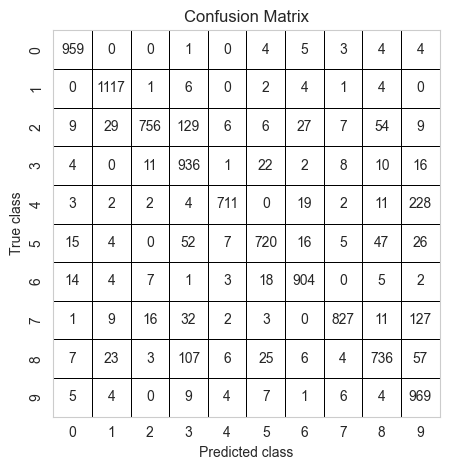

In [24]:
for times in range(0,64):
    train()
    
test()
get_accuracy()
plot_confusion_matrix(build_confusion_matrix(y_test, predicted), [0,1,2,3,4,5,6,7,8,9])

Ансамбль элементарных перцептронов

In [25]:
num_perceptrons = 5

In [26]:
w0_ens = []
for index in range(num_perceptrons):
    w0_ens.append(np.zeros((10,785)))

w0_ens = np.asarray(w0_ens)
print(w0_ens.shape)

wx_ens = []
for index in range(num_perceptrons):
    wx_ens.append(np.zeros((10,1)))
    
wx_ens = np.asarray(wx_ens)
print(wx_ens.shape)

(5, 10, 785)
(5, 10, 1)


In [27]:
def train_perceptron(wx, w0):
    
    pred_perceptron = []
    
    for i in range(len(x_train)):
        for j in range(len(w0)):
          wx[j] = np.dot(x_train[i], w0[j])
        y_pred = np.argmax(wx)
        pred_perceptron.append(y_pred)
    
        if y_pred != y_train[i]:
          y_actual = int(y_train[i]) 
          w0[y_pred] = w0[y_pred] - x_train[i]
          w0[y_actual] = w0[y_actual] + x_train[i]
            
    pred_perceptron = np.asarray(pred_perceptron)
    
    return pred_perceptron

In [28]:
def test_perceptron(wx, w0):
  
    test_perceptron_pred = []
  
    for i in range(len(x_test)):
        for j in range(len(w0)):
            wx[j] = np.dot(x_test[i],w0[j])
        y_pred1 = np.argmax(wx)
        test_perceptron_pred.append(y_pred1)
        
    test_perceptron_pred = np.asarray(test_perceptron_pred)
    
    return test_perceptron_pred


Обучение ансамбля

In [29]:
import statistics

In [30]:
def train_ensemble():
    global ensemble_train_accuracy
    ensemble_train_accuracy = 0
    
    pred_ensemble = np.empty([num_perceptrons, len(y_train)])
    
    for p in range(num_perceptrons):
        pred_ensemble[p] = train_perceptron(wx_ens[0], w0_ens[0])
    
    for i in range(len(y_train)):
        pred_ensemble_i = []
        for p in range(num_perceptrons):
            pred_ensemble_i.append(pred_ensemble[p][i])
            
        mode_value = statistics.mode(pred_ensemble_i)
        y_ensemble_pred = mode_value
        
        if y_ensemble_pred == y_train[i]:
            ensemble_train_accuracy += 1

In [31]:
def test_ensemble():
    global ensemble_test_accuracy
    global predicted_ensemble
  
    ensemble_test_accuracy = 0
    predicted_ensemble = np.empty(len(y_test))
    
    pred_ensemble = np.empty([num_perceptrons, len(y_test)])
    
    for p in range(num_perceptrons):
        pred_ensemble[p] = test_perceptron(wx_ens[0], w0_ens[0])
        
    for i in range(len(y_test)):
        pred_ensemble_i = []
        for p in range(num_perceptrons):
            pred_ensemble_i.append(pred_ensemble[p][i])
            
        mode_value = statistics.mode(pred_ensemble_i)
        y_ensemble_pred = mode_value
        
        predicted_ensemble[i] = y_ensemble_pred
        
        if y_ensemble_pred == y_test[i]:
            ensemble_test_accuracy += 1

In [32]:
def get_accuracy_ensemble():
    print("Training Accuracy:",ensemble_train_accuracy/(len(x_train)) * 100, "%")
    print("Testing Accuracy:",ensemble_test_accuracy/(len(x_test)) * 100, "%")
    print("Increase by:", ensemble_test_accuracy/(len(x_test)) * 100 - test_accuracy/(len(x_test)) * 100, "%")

Training Accuracy: 91.20833333333334 %
Testing Accuracy: 87.64999999999999 %
Increase by: 1.299999999999983 %


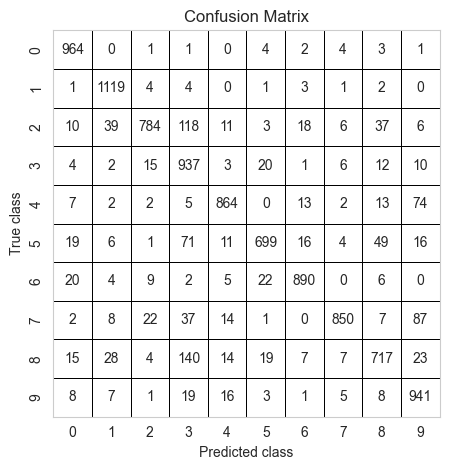

In [33]:
for times in range(0,64):
    train_ensemble()
    
test_ensemble()
get_accuracy_ensemble()
plot_confusion_matrix(build_confusion_matrix(y_test, predicted_ensemble), [0,1,2,3,4,5,6,7,8,9])

Зашумление данных

In [34]:
def gray_noise(pixel):
    result = random.randint(0, 255)
    while result == pixel:
        result = random.randint(0, 255)
    return result

In [35]:
def noise_image(image, probability, func):
    for x in range(image.shape[0]):
      if random.random() < probability:
        image[x] = func(image[x])


def noise_image_area(image, center, radius, probability, func):
    x_start = 0
    y_start = 0
    x_finish = 28
    y_finish = 28
    
    if center[0] - radius > 0:
        x_start = center[0] - radius
    if center[1] - radius > 0:
        y_start = center[1] - radius
    if center[0] + radius < 28:
        x_finish = center[0] + radius
    if center[1] + radius < 28:
        y_finish = center[1] + radius

    for x in range(x_start, x_finish):
        for y in range(y_start, y_finish):
            if random.random() < probability:
                image[x * 28 + y] = func(x * 28 + y)


def noise_images(images, prob, noise_func):
  for i in range(0, images.shape[0]):
    noise_image(images[i], prob, noise_func)


def noise_images_area(images, prob, noise_func):
  for i in range(0, images.shape[0]):
    noise_image_area(images[i], (random.randint(0, 27), random.randint(0, 27)), random.randint(2, 7), prob, noise_func)

  
def show_images(images):
  images = images.copy().reshape(len(images), 28, 28)
  from matplotlib import pyplot
  for i in range(min(9, len(images))):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [36]:
X_train_orig = x_train_noised.copy()
X_test_orig = x_test_noised.copy()

In [37]:
noise_images(x_train_noised, 0.3, gray_noise)
noise_images(x_test_noised, 0.3, gray_noise)

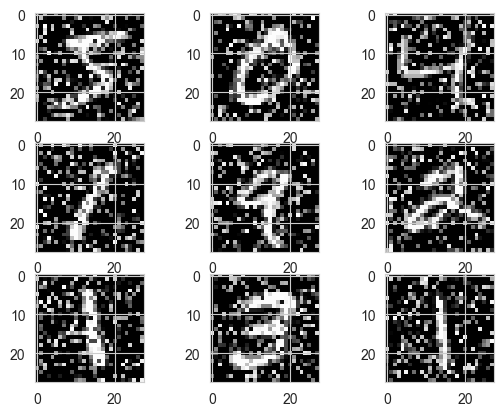

In [38]:
show_images(x_train_noised)

In [39]:
x_train = x_train_noised.reshape(60000, 28 * 28)
x_test = x_test_noised.reshape(x_test.shape[0], 28 * 28)

In [40]:
x_train = np.append(x_train_noised, np.ones([len(x_train),1]),1)
x_test = np.append(x_test_noised, np.ones([len(x_test),1]),1)

Перцептрон на равномерно зашумленных изображениях

Training Accuracy: 81.74833333333333 %
Testing Accuracy: 80.94 %


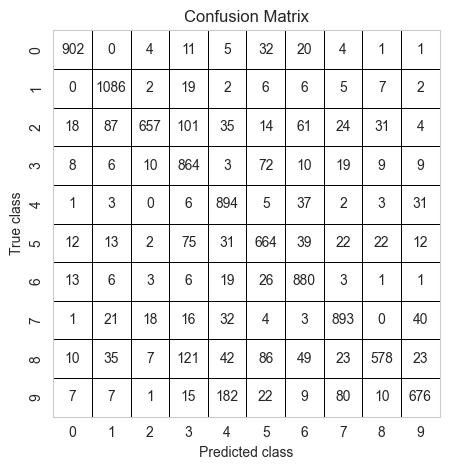

In [41]:
for times in range(0,64):
    train()
    
test()
get_accuracy()
plot_confusion_matrix(build_confusion_matrix(y_test, predicted), [0,1,2,3,4,5,6,7,8,9])

Ансамбль на равномерно зашумленных изображениях

Training Accuracy: 83.39999999999999 %
Testing Accuracy: 81.08 %
Increase by: 0.14000000000000057 %


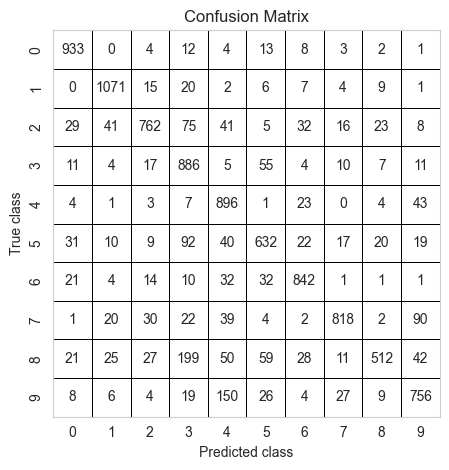

In [42]:
for times in range(0,64):
    train_ensemble()
    
test_ensemble()
get_accuracy_ensemble()
plot_confusion_matrix(build_confusion_matrix(y_test, predicted_ensemble), [0,1,2,3,4,5,6,7,8,9])

Неравномерное зашумление

In [43]:
x_train_noised = X_train_orig.copy()
x_test_noised = X_test_orig.copy()

In [44]:
noise_images_area(x_train_noised, 0.3, gray_noise)
noise_images_area(x_test_noised, 0.3, gray_noise)

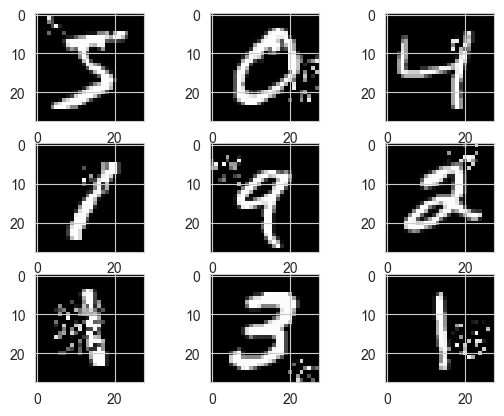

In [45]:
show_images(x_train_noised)

In [46]:
x_train = x_train_noised.reshape(60000, 28 * 28)
x_test = x_test_noised.reshape(x_test.shape[0], 28 * 28)

In [47]:
x_train = np.append(x_train_noised, np.ones([len(x_train),1]),1)
x_test = np.append(x_test_noised, np.ones([len(x_test),1]),1)

Перцептрон на неравномерно зашумленных изображениях

Training Accuracy: 88.31 %
Testing Accuracy: 85.8 %


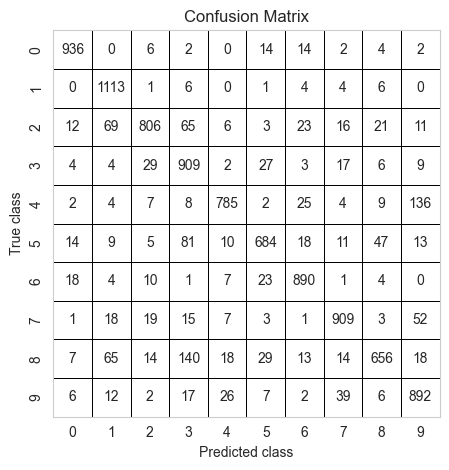

In [48]:
for times in range(0,64):
    train()
    
test()
get_accuracy()
plot_confusion_matrix(build_confusion_matrix(y_test, predicted), [0,1,2,3,4,5,6,7,8,9])

Ансамбль на неравномерно зашумленных изображениях

Training Accuracy: 89.88333333333334 %
Testing Accuracy: 86.74 %
Increase by: 0.9399999999999977 %


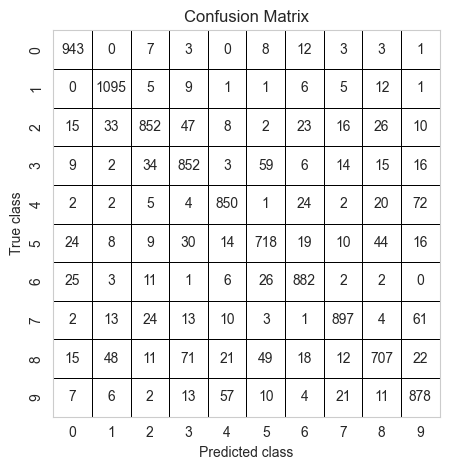

In [49]:
for times in range(0,64):
    train_ensemble()
    
test_ensemble()
get_accuracy_ensemble()
plot_confusion_matrix(build_confusion_matrix(y_test, predicted_ensemble), [0,1,2,3,4,5,6,7,8,9])